In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from validation.tests import get_Mw_samples, get_shear_samples
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [16]:
data = pd.read_excel('Data/full_data_2022-03-08.xlsx', na_values = ['nan','','NaN'])
data.columns = [str(c) for c in data.columns]

OG_fp = []
for c in data.columns:
    if isinstance(c, str):
        if 'fp' in c:
            OG_fp.append(c)
len(OG_fp)

do_pca = False
if do_pca:
    data, fp_cols, pca = fp_PCA(data, 17, cols = OG_fp)
    cols = fp_cols + ['Mw', 'Temperature', 'Shear_Rate','Melt_Viscosity']
else:
    fp_cols = OG_fp
    cols = fp_cols + ['Mw', 'Temperature', 'Shear_Rate','Melt_Viscosity']

# for c in ['Mw', 'Melt_Viscosity']:
#     data[c] = np.log10(data[c])

data['PDI'].fillna(2)
data['ZERO_SHEAR'] = 1
data['SHEAR'] = 0
data['log_Shear_Rate'] = 0
for i in data.index:
    if data.loc[i, 'Shear_Rate'] != 0:
        data.loc[i, 'SHEAR'] = 1
        data.loc[i, 'ZERO_SHEAR'] = 0
    if not data.loc[i,'PDI'] > 0:
        data.loc[i,'PDI'] = 2
    if data.loc[i,'PDI'] > 100:
        data.loc[i,'PDI'] = 2
        #data = data.drop([i])
train_df = data.copy()
train_df['Aug'] = 0

In [3]:
# logMw = np.array(train_df['Mw']).reshape((-1,1))
# shear = np.array(train_df['Shear_Rate']).reshape((-1,1))
# Temp = np.array(train_df['Temperature']).reshape((-1,1))
# Temp = 1/(Temp+273.15)
# PDI = np.array(train_df['PDI']).reshape((-1,1))

# scaler = MinMaxScaler(copy = False)
# XX = np.array(scaler.fit(train_df.filter(fp_cols)).transform(train_df.filter(fp_cols)))
# yy = np.array(train_df.loc[:,'Melt_Viscosity']).reshape((-1,1))

# y_scaler = MinMaxScaler().fit(yy)
# yy = y_scaler.transform(yy);
# T_scaler = MinMaxScaler().fit(Temp)
# T = T_scaler.transform(Temp);
# M_scaler = MinMaxScaler().fit(logMw)
# M = M_scaler.transform(logMw);
# S_trans = PowerTransformer(standardize = False).fit(shear)
# S_scaler = MinMaxScaler().fit(S_trans.transform(shear))
# S = S_scaler.transform(S_trans.transform(shear))
# P_scaler = MinMaxScaler().fit(PDI)
# P = P_scaler.transform(PDI)

In [17]:

Mw_samps, mw_ids = get_Mw_samples(train_df.copy().sort_index());
shear_samps, shear_ids = get_shear_samples(train_df.copy().sort_index())


3.4400750940427547


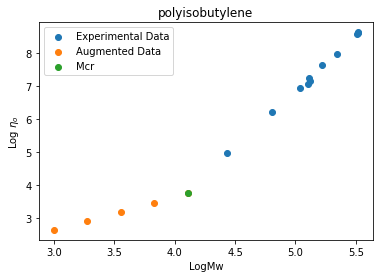

In [20]:
samp_num = 1
samp = Mw_samps.loc[Mw_samps['SAMPLE_ID'] == mw_ids[samp_num], :].reset_index()
Mw = np.array(samp['Mw']).reshape(-1,1)[~np.isnan(samp['Melt_Viscosity'])]
visc = np.array(samp['Melt_Viscosity']).reshape(-1,1)[~np.isnan(samp['Melt_Viscosity'])]
plt.scatter(Mw, visc, label = 'Experimental Data')
m, b = np.polyfit(Mw.reshape(-1,)[1:], visc.reshape(-1,)[1:], 1)
Mcr = np.log10(6400
*2
)
Mcr_y = Mcr*m + b
print(m)
low_Mw = np.linspace(3, Mcr, 5).reshape(-1,1)
visc_low_Mw = (low_Mw-Mcr) + Mcr_y
plt.scatter(low_Mw, visc_low_Mw, label = 'Augmented Data')
plt.scatter(Mcr, Mcr_y, label = 'Mcr')
plt.title(samp.loc[0,'Polymer'])
plt.ylabel(r'Log $\eta_o$')
plt.xlabel('LogMw')
plt.legend()

In [21]:
add = Mw_samps.loc[Mw_samps['SAMPLE_ID'] == mw_ids[samp_num], :].reset_index().loc[:4]
add['Melt_Viscosity'] = np.power(10,visc_low_Mw)
add['Mw'] = np.power(10, low_Mw)
add['PDI'] = np.mean(np.array(Mw_samps.loc[Mw_samps['SAMPLE_ID'] == mw_ids[samp_num], 'PDI']))
add['Mn'] = np.nan
add['Aug'] = 1
add = add.drop(columns=['index'])
add.head()

,INDEX,SAMPLE_ID,SMILES,Polymer,Mn,Mw,PDI,PDI (zw),Temperature,Shear_Rate,...,PID 2,coPID,Weight 1,Weight 2,Frequency,INDEX.1,ZERO_SHEAR,SHEAR,log_Shear_Rate,Aug
0,6,1001.0,[*]CC([*])(C)C,polyisobutylene,NaN,1000.000000,1.329091,1.09,25.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1
1,7,1001.0,[*]CC([*])(C)C,polyisobutylene,NaN,1891.483218,1.329091,1.12,25.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1
2,8,1001.0,[*]CC([*])(C)C,polyisobutylene,NaN,3577.708764,1.329091,1.16,25.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1
3,9,1001.0,[*]CC([*])(C)C,polyisobutylene,NaN,6767.176086,1.329091,1.14,25.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1
4,10,1001.0,[*]CC([*])(C)C,polyisobutylene,NaN,12800.000000,1.329091,1.16,25.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1


In [22]:
index = np.flatnonzero(Mw_samps['SAMPLE_ID'] == mw_ids[samp_num])
print(index)
#train_df = InsertSamps(train_df, add, index)

16


In [19]:
train_df = InsertSamps(train_df, add, index)

In [18]:
def InsertSamps(df, samps, index):
    n = samps.shape[0]
    before = df.iloc[[*range(0, index + 1, 1)], :]
    after = df.iloc[[*range(index + 1,df.shape[0], 1)], :]
    after.index = [x.__add__(n) for x in after.index]
    added = pd.concat([before, samps, after])
    return added

In [284]:
train_df.to_excel('Data/full_data_03_08_aug.xlsx')